In [28]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('data/raw/owid-co2-data.csv')

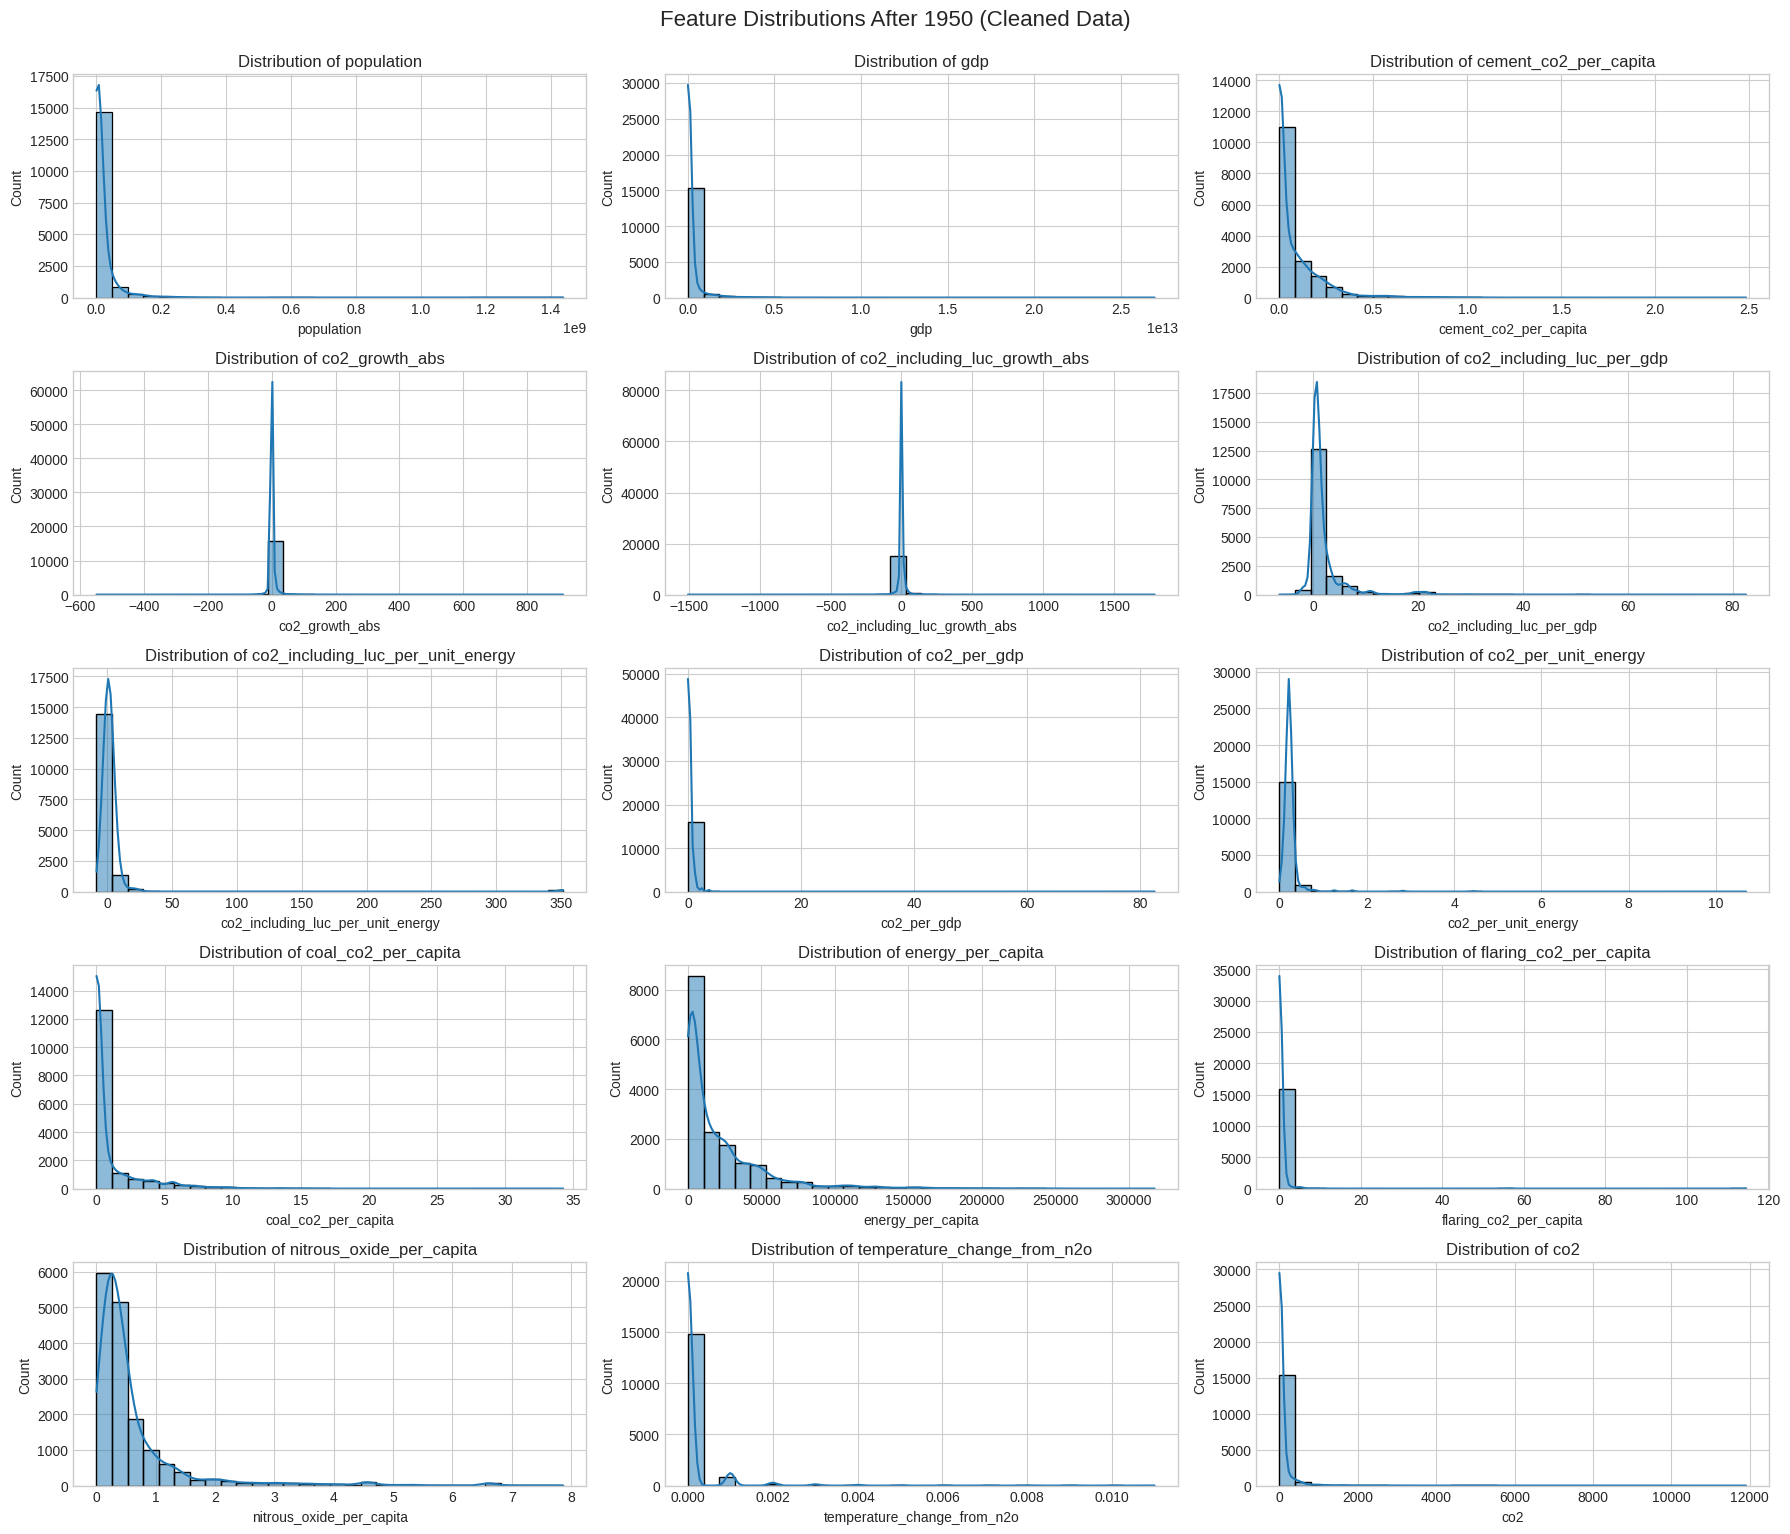

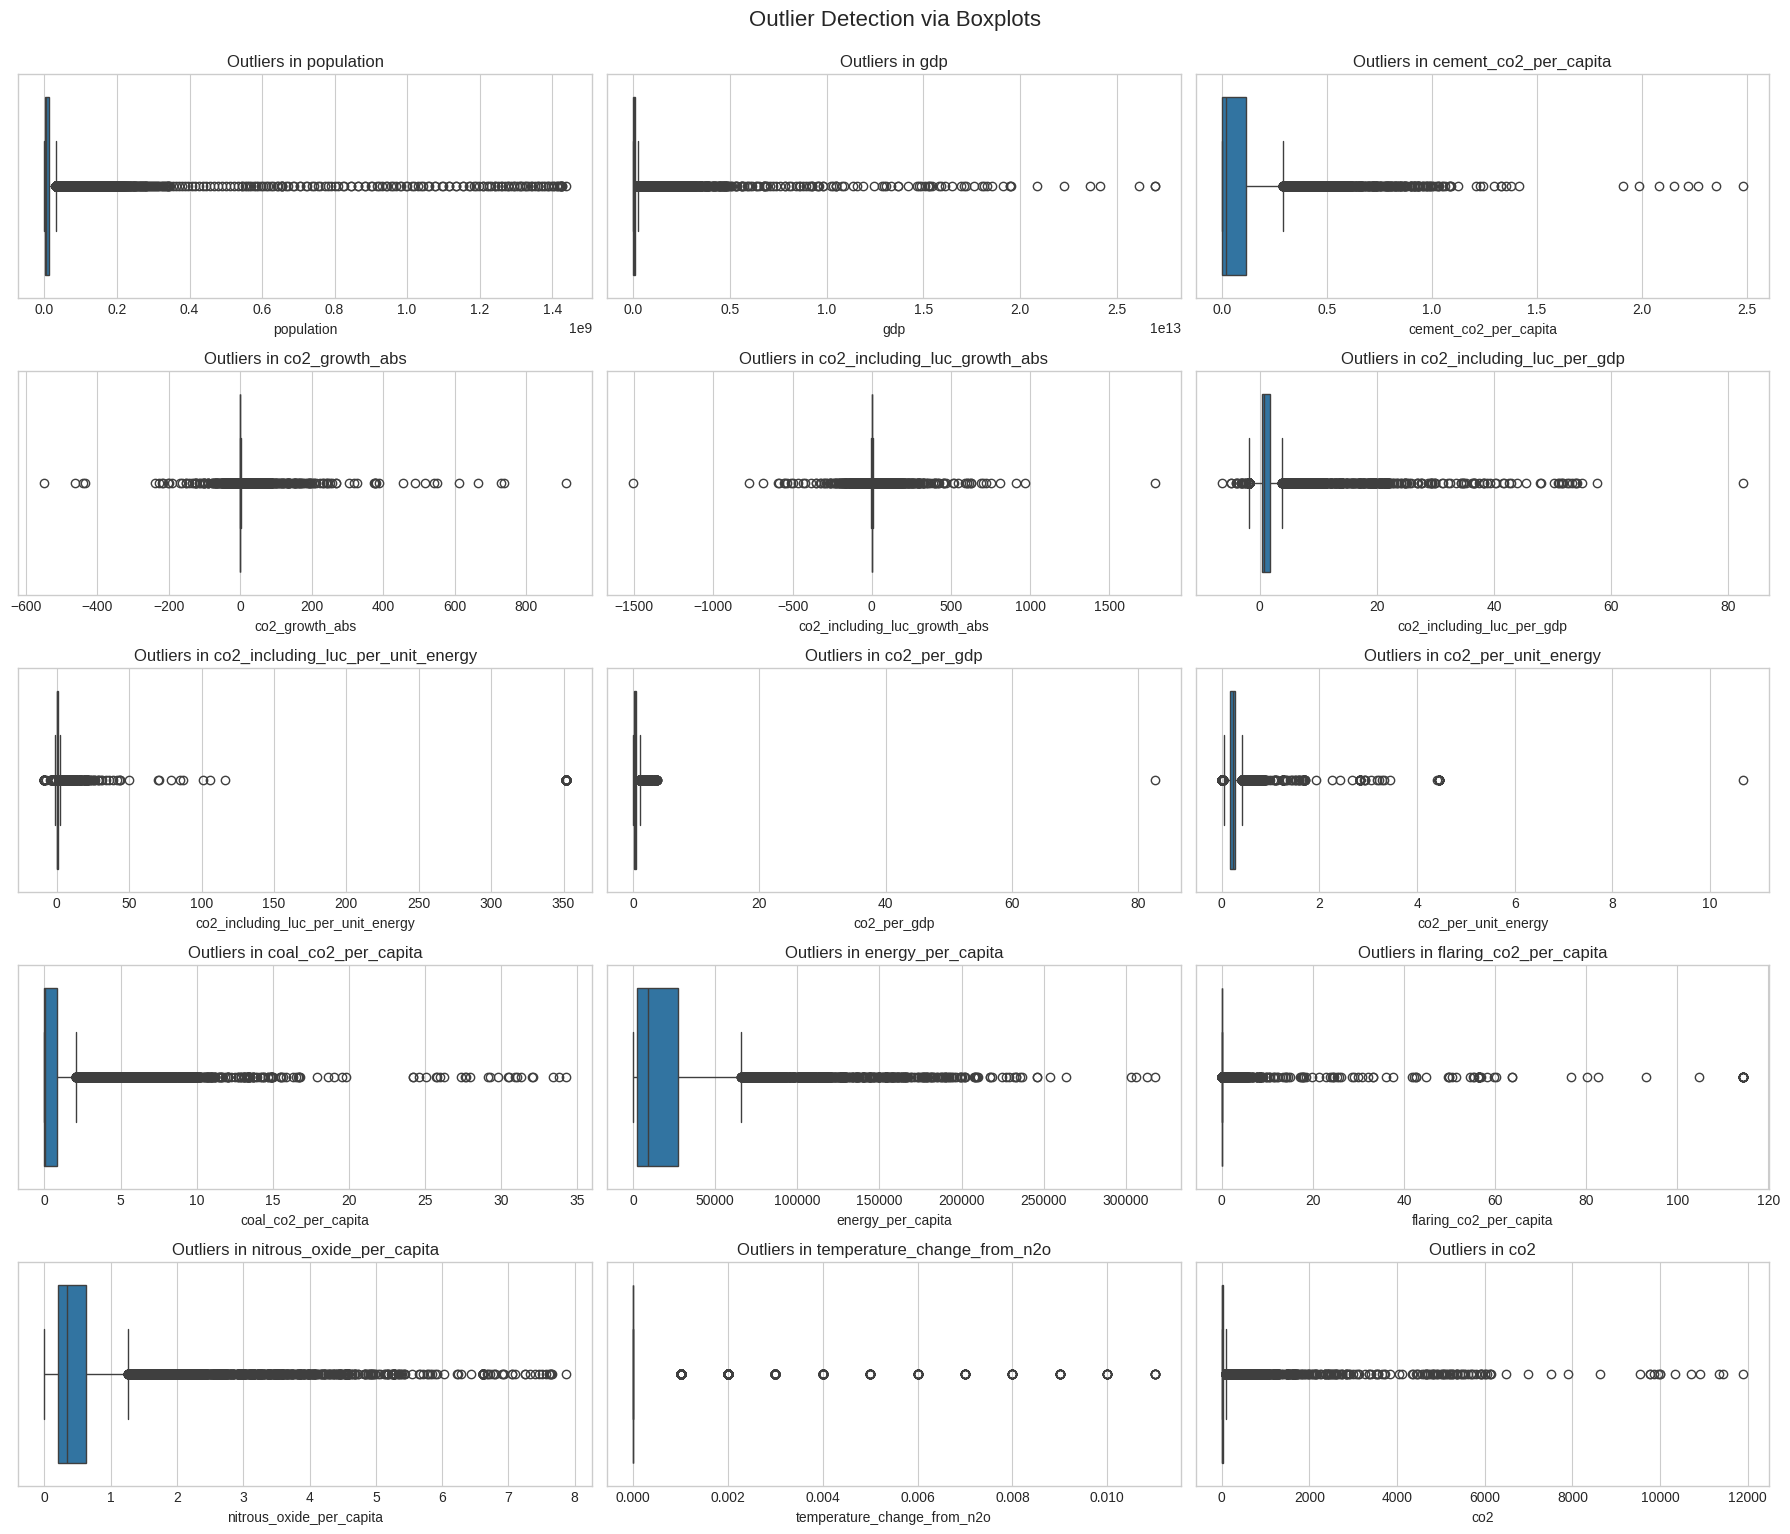

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv("data/raw/owid-co2-data.csv")

# Filter data post-1950
df_post_1950 = df[df["year"] >= 1950].reset_index(drop=True)

# Drop columns with >50% missing values post-1950
missing_post_1950 = df_post_1950.isna().mean()
cols_to_drop = missing_post_1950[missing_post_1950 > 0.5].index.tolist()
df_post_1950 = df_post_1950.drop(columns=cols_to_drop)

# Filter to only rows with valid ISO country codes (3-letter)
df_post_1950 = df_post_1950[df_post_1950["iso_code"].str.len() == 3]
df_post_1950 = df_post_1950.drop(columns=["iso_code"])

# Forward fill and backward fill within each country group
numeric_cols = df_post_1950.select_dtypes(include=[np.number]).columns.drop("year", errors='ignore')
df_post_1950[numeric_cols] = df_post_1950.groupby("country")[numeric_cols].ffill().bfill()

# Set up plotting
plt.style.use("seaborn-v0_8-whitegrid")
selected_cols = [
    'population', 'gdp', 'cement_co2_per_capita', 'co2_growth_abs',
    'co2_including_luc_growth_abs', 'co2_including_luc_per_gdp',
    'co2_including_luc_per_unit_energy', 'co2_per_gdp',
    'co2_per_unit_energy', 'coal_co2_per_capita', 'energy_per_capita',
    'flaring_co2_per_capita', 'nitrous_oxide_per_capita',
    'temperature_change_from_n2o', 'co2'
]

# Plot histograms for distribution
df_cleaned = df_post_1950[selected_cols].dropna()

plt.figure(figsize=(18, 15))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.suptitle("Feature Distributions After 1950 (Cleaned Data)", fontsize=16, y=1.02)
plt.show()

# Plot boxplots for outlier detection
plt.figure(figsize=(18, 15))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Outliers in {col}")
    plt.tight_layout()
plt.suptitle("Outlier Detection via Boxplots", fontsize=16, y=1.02)
plt.show()


In [30]:

df_post_1950 = df[df["year"] >= 1950].reset_index(drop=True)

missing_post_1950 = df_post_1950.isna().mean().sort_values(ascending=False)

cols_to_drop = missing_post_1950[missing_post_1950 > 0.5].index.tolist()

df = df_post_1950.drop(columns=cols_to_drop)

In [31]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,AFG,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,...,NaN,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,...,NaN,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,AFG,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,...,NaN,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,...,NaN,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,AFG,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,...,NaN,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,0.0,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,0.0,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,0.0,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,0.0,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [32]:
df = df[df['iso_code'].str.len() ==3].drop(columns='iso_code')

df

,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,7.316,...,NaN,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,8.264,...,NaN,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,9.192,...,NaN,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,10.269,...,NaN,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,11.137,...,NaN,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,19.807,...,0.0,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,17.430,...,0.0,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,18.752,...,0.0,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,18.447,...,0.0,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [33]:
numeric_cols = df.columns.drop('country').tolist()
numeric_cols

['year',
 'population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_growth_abs',
 'co2_growth_prct',
 'co2_including_luc',
 'co2_including_luc_growth_abs',
 'co2_including_luc_growth_prct',
 'co2_including_luc_per_capita',
 'co2_including_luc_per_gdp',
 'co2_including_luc_per_unit_energy',
 'co2_per_capita',
 'co2_per_gdp',
 'co2_per_unit_energy',
 'coal_co2',
 'coal_co2_per_capita',
 'cumulative_cement_co2',
 'cumulative_co2',
 'cumulative_co2_including_luc',
 'cumulative_coal_co2',
 'cumulative_flaring_co2',
 'cumulative_luc_co2',
 'cumulative_oil_co2',
 'energy_per_capita',
 'flaring_co2',
 'flaring_co2_per_capita',
 'ghg_excluding_lucf_per_capita',
 'ghg_per_capita',
 'land_use_change_co2',
 'land_use_change_co2_per_capita',
 'methane',
 'methane_per_capita',
 'nitrous_oxide',
 'nitrous_oxide_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'primary_energy_consumption',
 'share_global_cement_co2',
 'share_global_co2',
 'share_global_co2_including_luc',
 'share_gl

In [34]:
df

,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,7.316,...,NaN,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,8.264,...,NaN,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,9.192,...,NaN,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,10.269,...,NaN,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,11.137,...,NaN,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,19.807,...,0.0,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,17.430,...,0.0,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,18.752,...,0.0,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,18.447,...,0.0,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [35]:
df = df.sort_values(by=['country', 'year'])
df

,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,7.316,...,NaN,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,8.264,...,NaN,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,9.192,...,NaN,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,10.269,...,NaN,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,11.137,...,NaN,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,19.807,...,0.0,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,17.430,...,0.0,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,18.752,...,0.0,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,18.447,...,0.0,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [36]:
df[numeric_cols] = df.groupby('country')[numeric_cols].ffill().bfill()


In [37]:
df

,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,7.316,...,0.107,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,8.264,...,0.107,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,9.192,...,0.107,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,10.269,...,0.107,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,11.137,...,0.107,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,19.807,...,0.000,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,17.430,...,0.000,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,18.752,...,0.000,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,18.447,...,0.000,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [38]:
df.isna().sum()

country                        0
year                           0
population                     0
gdp                            0
cement_co2                     0
                              ..
temperature_change_from_co2    0
temperature_change_from_ghg    0
temperature_change_from_n2o    0
total_ghg                      0
total_ghg_excluding_lucf       0
Length: 62, dtype: int64

In [39]:
df

,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,7.316,...,0.107,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,8.264,...,0.107,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,9.192,...,0.107,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,10.269,...,0.107,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,11.137,...,0.107,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,19.807,...,0.000,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,17.430,...,0.000,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,18.752,...,0.000,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,18.447,...,0.000,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [40]:
df.to_csv('clean_raw.csv', index=False)

In [41]:
cols = ['year', 'population', 'gdp', 'cement_co2_per_capita', 'co2',
       'co2_growth_abs', 'co2_including_luc_growth_abs',
       'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
       'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2_per_capita',
       'energy_per_capita', 'flaring_co2_per_capita',
       'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2_per_capita', 'methane_per_capita',
       'nitrous_oxide_per_capita', 'oil_co2_per_capita',
       'primary_energy_consumption',
       'temperature_change_from_co2', 'temperature_change_from_ghg',
       'temperature_change_from_n2o', 'total_ghg', 'total_ghg_excluding_lucf']
final_df = df[cols]
final_df

,year,population,gdp,cement_co2_per_capita,co2,co2_growth_abs,co2_including_luc_growth_abs,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,...,land_use_change_co2_per_capita,methane_per_capita,nitrous_oxide_per_capita,oil_co2_per_capita,primary_energy_consumption,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,1950,7776182.0,9.421400e+09,0.000,0.084,0.070,1.066,0.941,0.777,0.557,...,0.930,1.042,0.288,0.008,7.791,0.000,0.001,0.0,19.447,1.453
1,1951,7879343.0,9.692280e+09,0.000,0.092,0.007,0.948,1.049,0.853,0.557,...,1.037,1.045,0.292,0.008,7.791,0.000,0.001,0.0,20.458,1.473
2,1952,7987783.0,1.001733e+10,0.000,0.092,0.000,0.928,1.151,0.918,0.557,...,1.139,1.048,0.297,0.007,7.791,0.000,0.001,0.0,21.356,1.484
3,1953,8096703.0,1.063052e+10,0.000,0.106,0.015,1.077,1.268,0.966,0.557,...,1.255,1.053,0.303,0.008,7.791,0.000,0.001,0.0,22.361,1.517
4,1954,8207953.0,1.086636e+10,0.000,0.106,0.000,0.869,1.357,1.025,0.557,...,1.344,1.059,0.310,0.008,7.791,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,2019,15271377.0,2.514642e+10,0.031,10.263,-0.942,-1.695,1.297,0.788,0.429,...,0.625,0.848,0.334,0.247,46.120,0.001,0.002,0.0,34.348,17.531
18760,2020,15526888.0,2.317871e+10,0.032,8.495,-1.768,-2.377,1.123,0.752,0.415,...,0.576,0.814,0.295,0.197,41.997,0.001,0.002,0.0,31.323,15.775
18761,2021,15797220.0,2.514009e+10,0.034,10.204,1.709,1.322,1.187,0.746,0.445,...,0.541,0.826,0.308,0.236,42.145,0.001,0.002,0.0,33.549,17.599
18762,2022,16069061.0,2.590159e+10,0.033,10.425,0.221,-0.305,1.148,0.712,0.445,...,0.499,0.806,0.302,0.210,42.145,0.001,0.002,0.0,33.772,17.910


In [42]:
# final_df.to_csv('clean.csv', index=False)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = final_df.drop(columns=['co2'])  # replace 'target_column' with your actual target name
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                              feature         VIF
0                                year    0.000469
1                          population    3.939696
2                                 gdp   11.506325
3               cement_co2_per_capita    1.606336
4                      co2_growth_abs    2.085895
5        co2_including_luc_growth_abs    1.450040
6        co2_including_luc_per_capita   35.554717
7           co2_including_luc_per_gdp    1.842379
8   co2_including_luc_per_unit_energy    2.219288
9                      co2_per_capita   80.516453
10                        co2_per_gdp    2.367432
11                co2_per_unit_energy    1.628359
12                coal_co2_per_capita    1.661346
13                  energy_per_capita    2.808645
14             flaring_co2_per_capita    1.781119
15      ghg_excluding_lucf_per_capita   49.279503
16                     ghg_per_capita   17.234844
17     land_use_change_co2_per_capita   25.633652
18                 methane_per_capita   15.015418


In [44]:
vif_data = vif_data[vif_data['VIF']<15].reset_index(drop=True)

In [45]:
features = vif_data['feature'].tolist()
final_clean_df = df[features+['country']+['co2']]

In [46]:
final_clean_df.to_csv('final_clean_df.csv', index=False)

In [47]:
final_clean_df.columns

Index(['year', 'population', 'gdp', 'cement_co2_per_capita', 'co2_growth_abs',
       'co2_including_luc_growth_abs', 'co2_including_luc_per_gdp',
       'co2_including_luc_per_unit_energy', 'co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2_per_capita', 'energy_per_capita',
       'flaring_co2_per_capita', 'nitrous_oxide_per_capita',
       'temperature_change_from_n2o', 'country', 'co2'],
      dtype='object')

In [48]:
# final_clean_df.drop(columns=['year','country'])

In [ ]:
# final_clean_df = final_clean_df.drop(columns=['year','country'])

In [50]:
import pandas as pd

correlation_with_co2 = final_clean_df.corr()['co2'].drop('co2').sort_values(ascending=False)

# Display
print(correlation_with_co2)


gdp                                  0.931674
temperature_change_from_n2o          0.864655
population                           0.656687
co2_growth_abs                       0.460319
coal_co2_per_capita                  0.232444
co2_including_luc_growth_abs         0.225211
cement_co2_per_capita                0.178966
energy_per_capita                    0.169082
co2_per_gdp                          0.050432
nitrous_oxide_per_capita             0.011920
co2_per_unit_energy                 -0.001655
flaring_co2_per_capita              -0.011816
co2_including_luc_per_unit_energy   -0.022130
co2_including_luc_per_gdp           -0.056308
Name: co2, dtype: float64


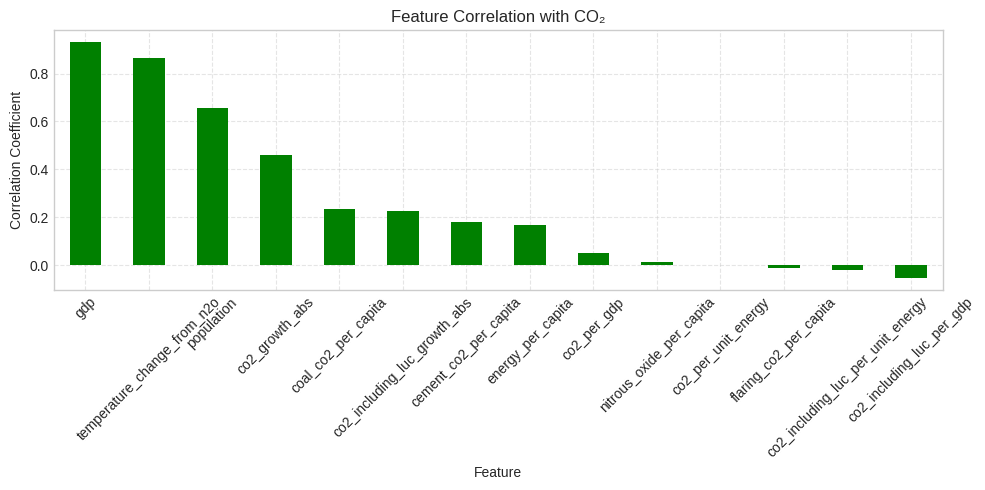

In [51]:
import matplotlib.pyplot as plt

correlation_with_co2.plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Feature Correlation with CO₂')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


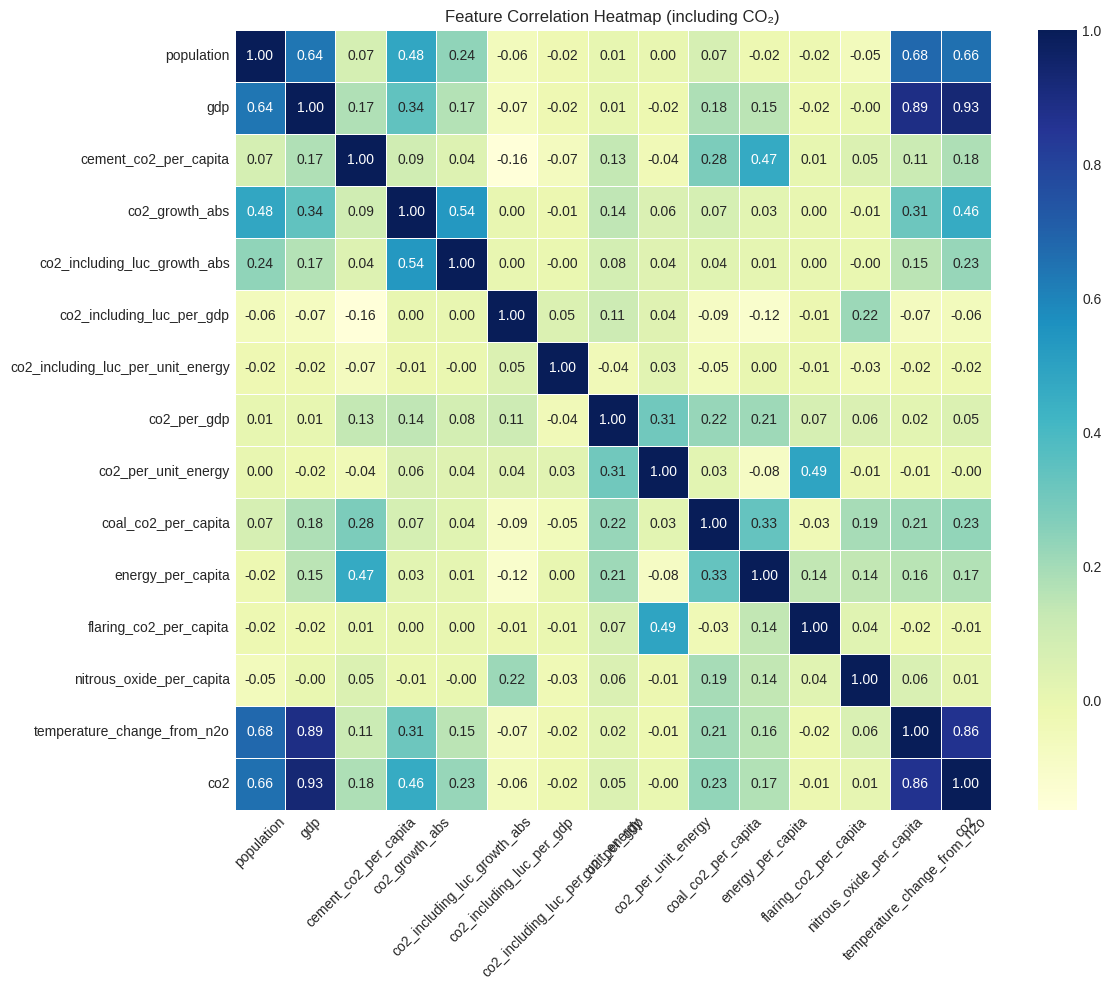

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only final selected features + 'co2'
selected_cols = [
    'population', 'gdp', 'cement_co2_per_capita', 'co2_growth_abs',
    'co2_including_luc_growth_abs', 'co2_including_luc_per_gdp',
    'co2_including_luc_per_unit_energy', 'co2_per_gdp',
    'co2_per_unit_energy', 'coal_co2_per_capita', 'energy_per_capita',
    'flaring_co2_per_capita', 'nitrous_oxide_per_capita',
    'temperature_change_from_n2o', 'co2'
]

# Compute correlation matrix
corr_matrix = final_df[selected_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (including CO₂)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import json

# Compute correlation matrix
corr_matrix = final_df[selected_cols].corr().round(2)

# Convert to a JSON list of { x, y, value } triples
correlation_data = []
for row in corr_matrix.index:
    for col in corr_matrix.columns:
        correlation_data.append({
            "x": row,
            "y": col,
            "value": corr_matrix.loc[row, col]
        })

# Save as JSON file
with open("correlation_heatmap_data.json", "w") as f:
    json.dump(correlation_data, f, indent=2)


In [56]:
final_clean_df

,population,gdp,cement_co2_per_capita,co2_growth_abs,co2_including_luc_growth_abs,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_gdp,co2_per_unit_energy,coal_co2_per_capita,energy_per_capita,flaring_co2_per_capita,nitrous_oxide_per_capita,temperature_change_from_n2o,co2
0,7776182.0,9.421400e+09,0.000,0.070,1.066,0.777,0.557,0.009,0.225,0.003,623.929,0.026,0.288,0.0,0.084
1,7879343.0,9.692280e+09,0.000,0.007,0.948,0.853,0.557,0.009,0.225,0.003,623.929,0.026,0.292,0.0,0.092
2,7987783.0,1.001733e+10,0.000,0.000,0.928,0.918,0.557,0.009,0.225,0.004,623.929,0.026,0.297,0.0,0.092
3,8096703.0,1.063052e+10,0.000,0.015,1.077,0.966,0.557,0.010,0.225,0.005,623.929,0.026,0.303,0.0,0.106
4,8207953.0,1.086636e+10,0.000,0.000,0.869,1.025,0.557,0.010,0.225,0.005,623.929,0.026,0.310,0.0,0.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,15271377.0,2.514642e+10,0.031,-0.942,-1.695,0.788,0.429,0.408,0.223,0.394,3003.655,0.000,0.334,0.0,10.263
18760,15526888.0,2.317871e+10,0.032,-1.768,-2.377,0.752,0.415,0.366,0.202,0.318,2680.132,0.000,0.295,0.0,8.495
18761,15797220.0,2.514009e+10,0.034,1.709,1.322,0.746,0.445,0.406,0.242,0.376,2635.154,0.000,0.308,0.0,10.204
18762,16069061.0,2.590159e+10,0.033,0.221,-0.305,0.712,0.445,0.402,0.242,0.405,2635.154,0.000,0.302,0.0,10.425


In [55]:
test_df = final_clean_df[final_clean_df['country'] == "Thailand"]


KeyError: 'country'

In [ ]:
test_df

In [ ]:
asean_countries = [
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", 
    "Myanmar", "Philippines", "Singapore", "Vietnam"
]

asean_df = final_clean_df[final_clean_df['country'].isin(asean_countries)]

asean_df

In [ ]:
global_df = final_clean_df[~final_clean_df['country'].isin(asean_countries + ["Thailand"])]

global_df

In [ ]:
from sklearn.model_selection import train_test_split

asean_train_df, asean_val_df = train_test_split(
    asean_df, 
    test_size=0.4, 
    random_state=42, 
    stratify=asean_df['country']
)

In [ ]:
train_df = pd.concat([global_df, asean_train_df], ignore_index=True)
train_df

In [ ]:
val_df = asean_val_df.reset_index(drop=True)
val_df

In [ ]:
test_df = test_df.reset_index(drop=True)
test_df

In [ ]:
train_df.to_csv('train_clean.csv', index=False)
test_df.to_csv('test_clean.csv', index=False)
val_df.to_csv('val_clean.csv', index=False)